MNIST를 사용해서 간단한 분류를 해보겠습니다. 이 데이터셋은 머신 러닝의 역사만큼 오래되었고 많은 연구에 사용되었습니다. 미국 국립표준기술연구소에서 수집한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있습니다. 딥러닝계의 'Hello world'라고 생각해도 됩니다.

In [1]:
from keras.datasets import mnist

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images와 train_labels가 모델이 학습해야 할 훈련 세트입니다. 또한 모델은 test_images와 test_labels로 구성된 테스트 세트로 테스트될 것입니다. 이미지는 넘파이 배열로 인코딩 되어있고, 레이블은 0에서 9까지의 숫자 배열입니다. 이미지와 레이블은 일대일 관계를 가집니다.

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_labels.shape

(60000,)

plt를 통해 이미지 하나를 확인해보겠습니다.
imshow() 메서드는 2차원 어레이나 텐서를 이미지로 읽어내는 기능을 합니다.

In [32]:
import matplotlib.pyplot as plt

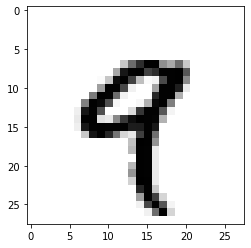

In [33]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

작업 순서는 다음과 같습니다. 먼저 훈련 데이터 train_images와 train_labels를 네트워크에 주입합니다. ( 입력층 ). 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됩니다. 마지막으로 test_images에 대한 예측을 네트워크에 요청합니다. 이 예측이 test_labels와 일치하는지 확인하는 것입니다.

In [34]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미있는 표현을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어있고, 점진적으로 데이터를 정제하는 형태를 띠고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어있는 데이터 프로세싱을 위한 여과기와 같습니다. 

이 예에서는 조밀하게 연결된 신경망 층인 Dense 층 2개가 연속되어 있습니다. 마지막 층은 10개의 확률 점수가 들어있는 배열입니다(모두 더하면 1이 되는 결과값을 출력하는 softmax층). 각 점수는 이미지가 숫자 클래스 중 하나에 속할 확률입니다.

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다.
- 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줍니다.
- 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- 훈련과 테스트 과정을 모니터링할 지표(metrics) : 여기서는 정확도를 고려하겠습니다. 
  - classification 혹은 regression인지에 따라서, 달라지고 그 분류 내에서도 다른 지표를 사용할 수 있음

In [35]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일링합니다.
( 네트워크가 훈련 데이터에 비해 너무 작은 경우, 데이터를 압축해서 학습하는 과정에서 손실이 발생 ) 

우리의 훈련 이미지는 [0, 255] 사이의 unit8 값으로 이루어진 (28 x 28) 배열이 60,000개 있는 세트입니다. 이 데이터를 [0, 1] 사이의 float32 값으로 이루어진 배열 세트로 변환합니다.

In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(test_iamges.shape)

(60000, 784)
(10000, 28, 28)


또한, 레이블을 범주형으로 인코딩 해야합니다.

In [38]:
from keras.utils.all_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

훈련 준비가 끝났습니다. 이제 fit 메서드를 호출하여 학습을 진행합니다.

In [39]:
network.fit(train_images, train_labels,
            epochs=5,
            batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2599 - acc: 0.9243
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1053 - acc: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0689 - acc: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0504 - acc: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0376 - acc: 0.9888


훈련이 끝났으니 각 epochs별 정확도를 확인해봅니다. 모델은 history 객체에 훈련의 결과로 얻은 변수를 딕셔너리 형식으로 저장하고 있습니다.

In [51]:
for i, j in enumerate(network.history.history['acc']):
    print(f"{i}번째 epochs의 정확도 : {(j*100):.3f}%")

0번째 epochs의 정확도 : 92.433%
1번째 epochs의 정확도 : 96.878%
2번째 epochs의 정확도 : 97.955%
3번째 epochs의 정확도 : 98.502%
4번째 epochs의 정확도 : 98.878%


이제 테스트 세트를 사용한 정확도를 확인해보겠습니다.

In [52]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - acc: 0.9811


In [55]:
print(f'테스트 세트의 손실 함수 : {test_loss}')
print(f'테스트 세트의 정확도 : {(test_acc*100):.3f}%')

테스트 세트의 손실 함수 : 0.06447701901197433
테스트 세트의 정확도 : 98.110%


충분히 좋은 퍼포먼스를 보여주지만, 훈련 세트 정확도보다 약간 낮습니다. 훈련 정확도와 테스트 정확도 간의 차이는 과대적합 때문입니다. 즉 테스트 정확도가 훈련 정확도에 비해 낮은 만큼 과대적합되었다고 볼 수 있습니다.